In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score



Confusion Matrix
Performance Scores
Use logisitc regression, randomforest
Graph to compare



From R Markdown analysis, we have determined that the most important features are 
inflight entertainment
ease of online booking
online support
on board service
leg room service

In [32]:
flight_df = pd.read_csv("Flight_Experience.csv")
flight_df.head()
flight_df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [86]:
flight_df["Gender"] = np.where(flight_df["Gender"] == "Female", 1, 0)
flight_df["Customer Type"] = np.where(flight_df["Customer Type"] == "Loyal Customer", 1, 0)
flight_df["Class"] = np.where(flight_df["Class"] == "Business", 2, np.where(flight_df["Class"] == "Eco Plus", 1, 0))


In [87]:


features = flight_df[['Inflight entertainment', 'Ease of Online booking', 'On-board service', 'Online support', 'Leg room service', 'Seat comfort', 'Online boarding', 'Gender', 'Customer Type', 'Class']].to_numpy()
dependent = flight_df['satisfaction'].to_numpy()

 
x_train, x_test, y_train, y_test = train_test_split(features, dependent, random_state=0)


In [83]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (97410, 10)
Training Labels Shape: (97410,)
Testing Features Shape: (32470, 10)
Testing Labels Shape: (32470,)


In [90]:
logreg = LogisticRegression()
decisiontree = DecisionTreeClassifier()
rf = RandomForestClassifier()


logreg.fit(x_train, y_train)
decisiontree.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [91]:


y_pred_log = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_log) 
print("Accuracy of Logistic Regression : ", accuracy)

y_pred_decisiontree = decisiontree.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred_decisiontree) 
print("Accuracy of Decision Tree : ", accuracy2)

y_pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf) 
print("Accuracy of Random Forest Classify : ", accuracy)



Accuracy of Logistic Regression :  0.7916538343085926
Accuracy of Decision Tree :  0.9092700954727441
Accuracy of Random Forest Classify :  0.9104712041884817


RandomForestClassifier()

C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression Confusion Matrix [[11062  3558]
 [ 3207 14643]]


C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[13203  1417]
 [ 1531 16319]]


C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[13150  1470]
 [ 1440 16410]]


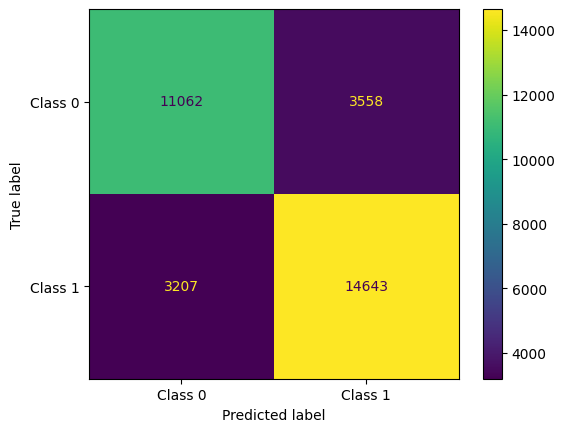

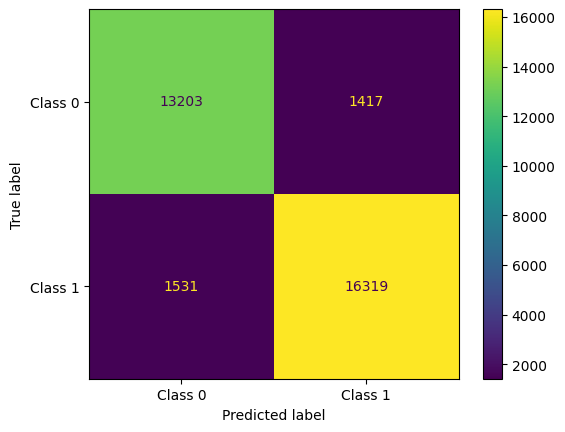

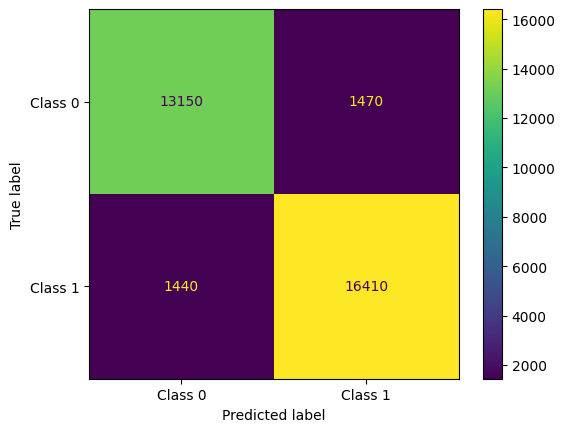

In [50]:
class_names = ["Class 0", "Class 1"]

disp = plot_confusion_matrix(logreg, x_test, y_test, display_labels=class_names)
print("Logistic Regression Confusion Matrix", disp.confusion_matrix) 

disp = plot_confusion_matrix(decisiontree, x_test, y_test, display_labels=class_names)
print(disp.confusion_matrix)

disp = plot_confusion_matrix(rf, x_test, y_test, display_labels=class_names)
print(disp.confusion_matrix)
